# **LangChain**

LangChain is an open-source framework that simplifies building applications powered by large language models (LLMs).  <br><br>

**Here's why something like LangChain is helpful:**<br>
* **LLMs are powerful but complex:** LLMs are incredibly good at understanding and generating human-like text, but working with them directly requires a lot of programming expertise. LangChain provides pre-built tools and abstractions that make it easier to interact with LLMs.

* **Improves accuracy and customization:**LangChain offers functionalities like prompt templates and retrieval modules. These allow developers to fine-tune how LLMs are prompted and what information they access, ultimately leading to more accurate and relevant outputs.

* **Faster development:** By providing building blocks like retrievers and parsers, LangChain saves developers time from writing complex code from scratch. This allows for faster experimentation and prototyping of LLM-based applications.

* **Empowers a wider range of developers:** LangChain's abstractions make it easier for developers with less expertise to get started with building LLM applications. This opens up the field to a broader range of innovators.

In [ ]:
# install the necessary module or packages:

!pip install langchain
!pip install openai
!pip install huggingface_hub

## **Load Model & Predict using LangChain:**

### **LangChain with HuggingFace Hub:**


In [ ]:
from google.colab import userdata
from langchain import HuggingFaceHub

HuggingFace_API_Token = userdata.get('huggingface_token_1') # get the HuggingFace API Tokens

#### **Example 01**

In [ ]:
# load the model from HuggingFace Hub:
llm = HuggingFaceHub(repo_id="google/flan-t5-large", huggingfacehub_api_token=HuggingFace_API_Token)
llm

In [ ]:
# Get the output using llm model:

input_text = "Can you tell me about India?"
output = llm.invoke(input=input_text)
print(output)

India is a country in the subcontinent of Asia .


#### **Example 02**

In [ ]:
llm = HuggingFaceHub(repo_id="facebook/bart-large-cnn",
                     huggingfacehub_api_token=HuggingFace_API_Token,
                     model_kwargs={"temperature":0})

# temperature 0 means perfectly get the accurate result.
# More towared the 0 menas, perfectly get the accurate result or model is very safe it is not taking any bets.
# More towared the 1 menas, not that much perfectly get the accurate result or it will take risk it might generate wrong output but it is very creative

llm

In [ ]:
input_text = """Prime Minister Narendra Modi today announced the development of "Mission Divyastra" -- an indigenously developed, highly advanced
                weapons system that alters the country's geopolitic position. The Agni-5 MIRV missile, developed by the defence research centre
                DRDO for over a decade, took its first flight today. The new weapon system has Multiple Independently Targetable Re-entry Vehicle (MIRV)
                technology, which ensures that a single missile can deploy multiple war heads at different locations. This is a technology currently
                possessed by a handful of nations and with its test, India has joined a select group of nations, said government sources.
                Proud of our DRDO scientists for Mission Divyastra, the first flight test of indigenously developed Agni-5 missile with Multiple
                Independently Targetable Re-entry Vehicle (MIRV) technology,' PM Modi posted on X, formerly Twitter."""

output = llm.invoke(input=input_text)
print(output)

The Agni-5 MIRV missile, developed by the defence research centre DRDO, took its first flight today. The new weapon system has Multiple Independently Targetable Re-entry Vehicle (MIRV) technology, which ensures that a single missile can deploy multiple war heads at different locations.


#### **Example 03**

In [ ]:
llm = HuggingFaceHub(repo_id="google/flan-t5-large",
                     huggingfacehub_api_token=HuggingFace_API_Token,
                     model_kwargs={"temperature":0, "max_length":64})

llm

In [ ]:
input_text = "I want to open a restaurant for Indian food. Suggest a fency 5 name for this."

output = llm.invoke(input=input_text)
print(output)

Indian restaurant


#### **Example 04**

In [ ]:
llm = HuggingFaceHub(repo_id="google/flan-t5-large",
                     huggingfacehub_api_token=HuggingFace_API_Token,
                     model_kwargs={"temperature":0, "max_length":64})

llm

In [ ]:
input_text = "translate English to German: How old are you?"

output = llm.invoke(input=input_text)
print(output)

Wie alte sind Sie?


### **LangChain with Gemini:**

In [ ]:
!pip install langchain_google_genai

In [ ]:
from google.colab import userdata
Gemini_API_Key = userdata.get('gimini_api_key_1') # get the Gemini API Key

#### **Get The List of Gemini Models Info.:**

In [ ]:
import google.generativeai as genai
genai.configure(api_key=Gemini_API_Key) # configure Gemini_API

In [ ]:
for models in genai.list_models():
  print(models)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

In [ ]:
# print all Content Generation models:

for models in genai.list_models():
  if "generateContent" in models.supported_generation_methods:
    print(models.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

#### **Example 01**

In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=Gemini_API_Key) # load the gemini-pro model
llm

ChatGoogleGenerativeAI(model='gemini-pro', google_api_key=SecretStr('**********'), client= genai.GenerativeModel(
   model_name='models/gemini-pro',
   generation_config={}.
   safety_settings={}
))

In [ ]:
input_text = "Tell me something about India?"
output = llm.invoke(input=input_text)
print(output.content)

**General Information:**

* **Official Name:** Republic of India
* **Capital:** New Delhi
* **Area:** 3.287 million square kilometers (7th largest country in the world)
* **Population:** 1.4 billion (second most populous country in the world)
* **Currency:** Indian Rupee (INR)
* **Official Languages:** Hindi and English (22 scheduled languages in total)

**History and Culture:**

* **Ancient Civilization:** India is home to one of the oldest civilizations in the world, with roots in the Indus Valley Civilization (c. 3300-1700 BCE).
* **Religious Diversity:** India is a melting pot of religions, including Hinduism, Buddhism, Jainism, Sikhism, Islam, Christianity, and Zoroastrianism.
* **Rich Heritage:** India has a rich cultural heritage, with ancient traditions in art, music, dance, literature, and architecture.
* **Independence:** India gained independence from British rule in 1947.

**Geography:**

* **Northern Mountains:** The Himalayas, the highest mountain range in the world, form

#### **Example 02**

In [ ]:
input_text = """Prime Minister Narendra Modi today announced the development of "Mission Divyastra" -- an indigenously developed, highly advanced
                weapons system that alters the country's geopolitic position. The Agni-5 MIRV missile, developed by the defence research centre
                DRDO for over a decade, took its first flight today. The new weapon system has Multiple Independently Targetable Re-entry Vehicle (MIRV)
                technology, which ensures that a single missile can deploy multiple war heads at different locations. This is a technology currently
                possessed by a handful of nations and with its test, India has joined a select group of nations, said government sources.
                Proud of our DRDO scientists for Mission Divyastra, the first flight test of indigenously developed Agni-5 missile with Multiple
                Independently Targetable Re-entry Vehicle (MIRV) technology,' PM Modi posted on X, formerly Twitter.
                Generate the summary within 5 lines.
                """

output = llm.invoke(input=input_text)
print(output.content)

Prime Minister Modi announced the development of "Mission Divyastra," an indigenous weapons system that enhances India's geopolitical standing. The Agni-5 MIRV missile, developed by DRDO, successfully completed its maiden flight. The system incorporates Multiple Independently Targetable Re-entry Vehicle (MIRV) technology, allowing a single missile to deploy multiple warheads at different locations. India joins an exclusive group of nations with this technology, currently possessed by only a few. PM Modi expressed pride in DRDO scientists for this achievement.


#### **Example 03**

In [ ]:
input_text = "How are you? translate into Bengali language"
output = llm.invoke(input=input_text)
print(output.content)

তুমি কেমন আছ?


### **LangChain with OpenAI:**

In [ ]:
from google.colab import userdata

OpenAI_API_Key = userdata.get('open_ai_api_key_1') # get the OpenAI key

#### **Get The List of OpenAI models:**

In [ ]:
!pip install openai

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=OpenAI_API_Key)
client

In [ ]:
client.models.list().data

[Model(id='gpt-3.5-turbo-16k-0613', created=1685474247, object='model', owned_by='openai'),
 Model(id='dall-e-3', created=1698785189, object='model', owned_by='system'),
 Model(id='text-embedding-3-large', created=1705953180, object='model', owned_by='system'),
 Model(id='dall-e-2', created=1698798177, object='model', owned_by='system'),
 Model(id='whisper-1', created=1677532384, object='model', owned_by='openai-internal'),
 Model(id='tts-1-hd-1106', created=1699053533, object='model', owned_by='system'),
 Model(id='tts-1-hd', created=1699046015, object='model', owned_by='system'),
 Model(id='gpt-3.5-turbo-0125', created=1706048358, object='model', owned_by='system'),
 Model(id='text-embedding-3-small', created=1705948997, object='model', owned_by='system'),
 Model(id='gpt-3.5-turbo', created=1677610602, object='model', owned_by='openai'),
 Model(id='gpt-3.5-turbo-0613', created=1686587434, object='model', owned_by='openai'),
 Model(id='gpt-3.5-turbo-0301', created=1677649963, object='

In [ ]:
import pandas as pd

openai_models = client.models.list().data
pd.DataFrame(openai_models, columns=['id', 'created', 'object', 'owned_by'])

,id,created,object,owned_by
0,"(id, gpt-3.5-turbo-16k-0613)","(created, 1685474247)","(object, model)","(owned_by, openai)"
1,"(id, dall-e-3)","(created, 1698785189)","(object, model)","(owned_by, system)"
2,"(id, text-embedding-3-large)","(created, 1705953180)","(object, model)","(owned_by, system)"
3,"(id, dall-e-2)","(created, 1698798177)","(object, model)","(owned_by, system)"
4,"(id, whisper-1)","(created, 1677532384)","(object, model)","(owned_by, openai-internal)"
5,"(id, tts-1-hd-1106)","(created, 1699053533)","(object, model)","(owned_by, system)"
6,"(id, tts-1-hd)","(created, 1699046015)","(object, model)","(owned_by, system)"
7,"(id, gpt-3.5-turbo-0125)","(created, 1706048358)","(object, model)","(owned_by, system)"
8,"(id, text-embedding-3-small)","(created, 1705948997)","(object, model)","(owned_by, system)"
9,"(id, gpt-3.5-turbo)","(created, 1677610602)","(object, model)","(owned_by, openai)"


## **PromptTemplate:**

**Definition:**<br>
**Prompt templates are predefined recipes for generating prompts for language models.** A PromptTemplate in LangChain is like that instruction for a large language model. It's a pre-built message with blanks that you can fill in to tell the LLM exactly what you want it to do.<br>

**For instance, a simple template might be:** "Write a story about a brave **{animal}** who goes on an adventure." You could replace "**{animal}**" with "dog", "cat", or anything else to create different stories.<br>

Currently in the above applications we are writing an entire prompt, if you are creating a user directed application then this is not an ideal case. LangChain faciliates prompt management and optimization. **Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt, and only then send that to the LLM.**
<br><br>

**Here's why PromptTemplates are helpful:**<br>
* **Easy to understand:** They make it clear what you want the LLM to do.
* **Flexible:** You can change the details to fit your needs.
* **Less mistakes:** Using a template reduces types and errors in your instructions.
* **Faster work:** You don't have to write the whole message every time.
<br><br>

**LangChain offers two main types of PromptTemplates:**<br>
* **PromptTemplate:** This is for general prompts where you might have instructions or context for the LLM.
* **ChatPromptTemplate:** This is specifically designed for crafting prompts within a chat-like conversation.
<br><br>



#### **Example 01**

In [ ]:
# These examples is very much convenient way:

from langchain.prompts import PromptTemplate


prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)
p = prompt_template_name.format(cuisine="Italian")
print(p)

I want to open a restaurant for Italian food. Suggest a fency name for this.


#### **Example 02**

In [ ]:
from langchain.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template("Give me some {company_name} products name.")
prompt_template.format(company_name="Apple")

'Give me some Apple products name.'

## **Chain:**


In LangChain, a Chain is the core concept that ties everything together. It acts like a recipe that outlines the specific steps to be taken for a particular task.<br><br>

**What is a Chain?**<br>
Imagine a recipe for a cake. It outlines the ingredients and steps needed to bake it. Similarly, **a Chain defines a sequence of actions**, which can involve:<br>

* Calling a Large Language Model (LLM) with a specific prompt.
* Retrieving information from a data source.
* Processing information using built-in LangChain tools.
* Performing other actions as needed.
<br><br>

**Chains are essential in LangChain for several reasons:**<br>
* **Structured Workflows:** Chains provide a clear and organized way to define the steps involved in a task. This makes your code more readable and maintainable.

* **Modular Design:** By breaking down tasks into smaller steps within a Chain, you can easily reuse components for different applications.

* **Flexibility and Customization:** Chains allow you to combine different functionalities to create complex workflows tailored to your specific needs.

* **Improved Efficiency:** Pre-built chain functionalities save you time from writing complex code from scratch.
<br><br>

**LangChain offers two main types of Chains:**<br>
* **LLM Chains:** These focus on interacting with one or more LLMs for tasks like text generation, translation, or summarization.

* **Utility Chains:** These are more specialized and might involve a combination of LLMs, data processing steps, and other tools to achieve a specific goal.
<br><br>

**Note:**
* Chain is multi-step workflows.
* Using Chains we will link together model and the PromptTemplate and other Chains.
* The simplest and most common type of Chain is LLMChain, which passes the input first to Prompt Template and then to Large Language Model.
* LLMChain is responsible to execute the PromptTemplate, For every PromptTemplate we will specifically have an LLMChain.


### **LLMChain:**

In [ ]:
import google.generativeai as genai

llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=Gemini_API_Key) # load the gemini-pro model
llm

ChatGoogleGenerativeAI(model='gemini-pro', google_api_key=SecretStr('**********'), client= genai.GenerativeModel(
   model_name='models/gemini-pro',
   generation_config={}.
   safety_settings={}
))

#### **Example 01**

In [ ]:
# define the PromptTemplate:
from langchain.prompts import PromptTemplate

get_cuisine_template = PromptTemplate(
    input_variables=['cuisine'],
    template="Please give top 5 {cuisine} food."
)

In [ ]:
# create a chain:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm, prompt=get_cuisine_template)
response = chain.invoke('Indian')
print("Cuisine Name: ", response['cuisine'], "\n")

print("List of Cuisines:")
print(response['text'])

Cuisine Name:  Indian 

List of Cuisines:
1. Butter Chicken
2. Chicken Tikka Masala
3. Palak Paneer
4. Biryani
5. Aloo Gobi


#### **Example 02**

In [ ]:
chain = LLMChain(llm=llm, prompt=get_cuisine_template, verbose=True) # verbose=True, means get info step wise, how chain is work
response = chain.invoke('Bengali')
print("Cuisine Name: ", response['cuisine'], "\n")

print("List of Cuisines:")
print(response['text'])



> Entering new LLMChain chain...
Prompt after formatting:
Please give top 5 Bengali food.

> Finished chain.
Cuisine Name:  Bengali 

List of Cuisines:
1. **Machher Jhol (Fish Curry)**: A classic Bengali dish featuring tender fish cooked in a flavorful curry made with mustard seeds, turmeric, and other spices.
2. **Bhapa Ilish (Steamed Hilsa)**: A delicate and aromatic dish where hilsa fish is steamed in a banana leaf with mustard oil, green chilies, and ginger.
3. **Kosha Mangsho (Mutton Curry)**: A rich and flavorful mutton curry cooked slowly in a blend of spices, yogurt, and potatoes.
4. **Luchi and Alu Dom (Fried Flatbread and Potato Curry)**: A popular Bengali breakfast or snack, consisting of crispy fried flatbread served with a spicy potato curry.
5. **Mishti Doi (Sweet Yogurt)**: A creamy and velvety dessert made from sweetened yogurt, often flavored with jaggery or date palm sugar.


### **Simple Sequential Chain:**

**Definition:**<br>
In LangChain, a Simple Sequential Chain is the most basic building block for building workflows.<br>

Imagine a simple assembly line where one task follows another in a straight line. A Simple Sequential Chain works similarly. **It's a series of steps where the output from one step becomes the input for the next.**<br><br>

**Each step typically involves:**<br>
* **A single input:** This could be text, data, or instructions for the LLM.

* **A single output:** This is the result of the step, which becomes the input for the next step in the chain.
<br><br>

**For example, a simple chain might involve:**<br>
1. Taking a user query as input.
2. Using that query to prompt an LLM for relevant information.
3. Processing the LLM response and presenting it to the user.
<br><br>

**Pros of Simple Sequential Chains:**<br>
* **Easy to understand and use:** Simple structure makes them ideal for beginners or for tasks with a linear flow.

* **Efficient for linear workflows:** They're perfect for tasks where each step directly builds upon the previous one.

* **Easy to debug:** Since the flow is straightforward, it's simpler to identify and fix any issues within the chain.
<br><br>

**Conos of Simple Sequential Chains:**<br>
* **Limited complexity:** They can't handle complex workflows with branching logic or multiple inputs/outputs. **There is a issue with SimpleSequentialChain it only shows last input information.**

* **Less flexibility:** They offer limited options for handling errors or unexpected situations within the chain.

* **Potential redundancy:** For some tasks, there might be more efficient chain structures available.

#### **Example 01**

In [ ]:
import google.generativeai as genai

llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=Gemini_API_Key) # load the gemini-pro model
llm

ChatGoogleGenerativeAI(model='gemini-pro', google_api_key=SecretStr('**********'), client= genai.GenerativeModel(
   model_name='models/gemini-pro',
   generation_config={}.
   safety_settings={}
))

In [ ]:
# create prompt for getting unique restaurant name:
get_restaurant_template = PromptTemplate(
    input_variables = ['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest name for this."
)
restaurant_chain = LLMChain(llm=llm, prompt=get_restaurant_template)


# Now create prompt for getting unique menu for those restaurant:
get_menu_template = PromptTemplate(
    input_variables = ['restaurant_name'],
    template = "Suggest some menu items for {restaurant_name}"
)
menu_chain = LLMChain(llm=llm, prompt=get_menu_template)


# now sequentialy access those chains:
from langchain.chains import SimpleSequentialChain
chain = SimpleSequentialChain(chains=[restaurant_chain, menu_chain])

response = chain.invoke("Indian")

In [ ]:
print("Cuisine: ", response['input'])
print("Restaurant Name:")
print(response['output'])

Cuisine:  Indian
Restaurant Name:
**Traditional and Cultural:**

* **Rasoi's Royal Thali:** A traditional Indian platter featuring various curries, rice, and breads.
* **Dastarkhwan Delights:** A selection of kebabs, curries, and vegetarian dishes served on a traditional tablecloth.
* **Tandoori Temptation:** An array of tandoori-cooked meats, vegetables, and breads.
* **Chulha's Rustic Flavors:** Home-style curries and breads cooked on a traditional clay stove.
* **Masala Magic:** A symphony of spices and flavors showcased in curries, chutneys, and pickles.

**Regional and Specific:**

* **Punjabi Dhaba Feast:** A hearty spread of Punjabi dishes like butter chicken, dal makhani, and tandoori roti.
* **Hyderabadi Biryani Extravaganza:** A selection of fragrant and flavorful biryani dishes from the Nizami kitchen.
* **Chettinad Curry House Classics:** A fiery and aromatic menu featuring Chettinad specialties like chicken 65 and mutton sukka.
* **Kolkata Kathi Roll Carnival:** A street f

### **Sequential Chain:**


**Definition:**<br>
A Sequential Chain is a step up in complexity compared to a Simple Sequential Chain. It allows you to create workflows with more intricate data flow. Imagine a multi-lane highway where information can travel on different lanes but still progresses in a specific order.
<br><br>

**Here's what a Sequential Chain can handle:**<br>
* **Multiple Inputs:** You can feed the chain with data from various sources, like user queries, retrieved information, or previous chain outputs.

* **Multiple Outputs:** The chain can produce different outputs simultaneously, allowing for more informative results.

* **Sub-Chains:** You can even integrate smaller, Simple Sequential Chains within a larger Sequential Chain for modularity.
<br><br>

**Pros of Sequential Chains:**<br>
* **Increased Flexibility:** They enable you to design more complex workflows with branching logic or conditional actions based on intermediate outputs.

* **Better Data Handling:** The ability to handle multiple inputs and outputs allows for richer processing and analysis of information.

* **Modular Design:** By incorporating sub-chains, you can break down complex tasks into smaller, reusable components.
<br><br>

**Cons of Sequential Chains:**<br>
* **Steeper Learning Curve:** Understanding and building these chains requires a bit more programming knowledge compared to Simple Sequential Chains.

* **Increased Debugging Complexity:** With more moving parts, troubleshooting issues within the chain might take more effort.

* **Potential for Over-engineering:** For simpler tasks, a Sequential Chain might be overkill, and a Simple Sequential Chain could be sufficient.



#### **Example 01**

In [ ]:
# create prompt for getting unique restaurant name:
get_restaurant_template = PromptTemplate(
    input_variables = ['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest only 5 name for this."
)
restaurant_chain = LLMChain(llm=llm, prompt=get_restaurant_template, output_key='restaurant_name')


# Now create prompt for getting unique menu for those restaurant:
get_food_item_template = PromptTemplate(
    input_variables = ['restaurant_name'],
    template = "Suggest some 5 food items for {restaurant_name}"
)
food_menu_chain = LLMChain(llm=llm, prompt=get_food_item_template, output_key='menu_items')


# now sequentialy access those chains:
from langchain.chains import SequentialChain
chain = SequentialChain(
    chains=[restaurant_chain, food_menu_chain],
    input_variables = ['cuisine'],
    output_variables = ['restaurant_name', 'menu_items']

)

response = chain.invoke({"cuisine": "indian"})

In [ ]:
print("Cuisine Name: ", response['cuisine'], "\n")

# print("Restaurant Name:")
# print(response['restaurant_name'], "\n")

print("Restaurant Name with Food Menu Items: ")
print(response['menu_items'])

Cuisine Name:  indian 

Restaurant Name with Food Menu Items: 
**1. Saffron & Spice**
* Saffron-infused Chicken Biryani
* Paneer Tikka Masala with Sautéed Spinach
* Vegetable Korma with Cardamom and Cinnamon
* Gulab Jamun with Saffron Syrup
* Mango Lassi

**2. Tandoori Temptation**
* Tandoori Chicken with Mint Chutney
* Chicken Tikka Masala with Smokey Flavors
* Dal Makhani with Creamy Texture
* Garlic Naan with Coriander
* Kulfi with Pistachio and Saffron

**3. Curry Corner**
* Chicken Vindaloo with Tangy Spices
* Lamb Rogan Josh with Aromatic Herbs
* Vegetarian Thali with a Variety of Curries
* Aloo Palak with Spinach and Potatoes
* Raita with Cucumber and Mint

**4. Namaste Flavors**
* Butter Chicken with a Rich Tomato-Based Sauce
* Palak Paneer with Silky Spinach and Cottage Cheese
* Vegetable Samosas with Crisp Pastry and Savory Filling
* Basmati Rice with Cardamom and Bay Leaves
* Mango Chutney with Sweet and Tangy Notes

**5. Masala Magic**
* Paneer Butter Masala with Creamy Tom

## **Agent & Tools:**

### **Agent:**

**Definition:**<br>
In LangChain, an Agent is a powerful component that acts as an intermediary between the user and the world. It's essentially a program designed to take actions and interact with the real world based on instructions and information processing. <br>
Agents involve an LLM making decisions about which Actions to take, taking that Action, seeing an Observation, and repeating that until done.<br>

When used correctly agents can be extremely powerful. **In order to load agents, you should understand the following concepts:**<br>
* **Tool:** A function that performs a specific duty. This can be things like: Google Search, Database lookup, Python REPL, other chains.
* **LLM:** The language model powering the agent.
* **Agent:** The agent to use.
<br><br>


**Example:**<br>
For example I have to travel from Dubai to Canada, I type this in ChatGPT. Like **Give me two flight options from Dubai to Canada on September 1, 2023.** <br>
ChatGPT will not be able to answer because has knowledge till September 2021.
ChatGPT plus has Expedia Plugin, if we enable this plugin it will go to Expedia Plugin and will try to pull information about Flights & it will show the information.<br>

**What exactly happens when we try to enable this plugin:**<br>

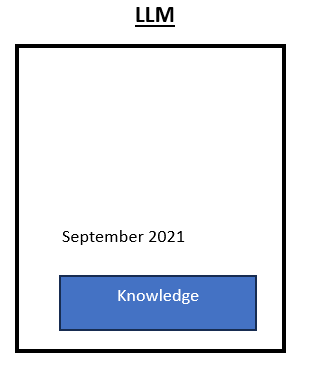

When we think about LLM. Many people think that it is just a **knowledge engine**, it has knowledge and it will try to give answer based on that knowledge but the knowledge is only limited to September 2021. The think that most people missout is that Large Lanaguage Model has a reasoning engine, and using that **reasoning engine** it can figure out when someone types this type of Question. Like:<br>
**Give me two flight options from Dubai to Canada on September 1, 2023.**<br>

As a human we go to Expedia as we have a reasoning engine in our brain.<br>
LLM has a reasoning engine as well, so it will figure out the Source, Destination, Date and it will call Expedia Plugin and it will return response back.<br>

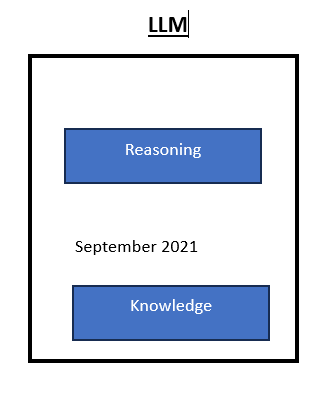




**An agent has access to a suite of tools, and determines which ones to use depending on the user input.**<br>

Agent will conenct with external tools and it will use LLM reasoning capabilities.<br>
All the tools like Google Search Tool and Math Tool are available as part of LangChain and you can configure agent, so agent is nothing but using all these tools and LLM reasoning capabilities to perform a given task.<br>
To access Google Search Results in Real Time we use **serpapi**.
<br><br>

**Roles of a LangChain Agent:**
* **Understanding User Input:** An agent can receive input from users in various forms, like text queries or voice commands. It processes this input to understand the user's intent.

* **Decision Making:** Based on the user input and potentially other information sources, the agent decides on the course of action. This might involve using LangChain's tools or interacting with external systems.

* **Interaction and Action Taking:** Agents can interact with various external systems through APIs or directly manipulate the real world (in controlled environments). This could involve things like:<br>
  * Accessing and retrieving data from databases or web services,
  * Controlling smart home devices,
  * Generating different creative text formats based on user requests.

* **Response Generation:** After taking action, the agent prepares a response for the user. This could be presenting retrieved information, summarizing results, or confirming actions taken.
<br><br>

**Responsibilities of a LangChain Agent:**<br>
* **Flexibility and Adaptability:** Agents should be able to handle a variety of user inputs and situations, potentially adapting their actions based on context.

* **Reasoning and Logic:** They need some level of reasoning ability to choose the most appropriate course of action based on the available information.

* **Information Processing:** Agents can process information from various sources, including user input, LLM outputs, and external data sources, to make informed decisions.

* **Communication:** Effective communication with the user is crucial. Agents should present clear and concise responses that reflect their actions and the results achieved.
<br><br>

**In Short:**<br>
LangChain Agents are like smart assistants that leverage the power of large language models (LLMs) and other tools to understand user requests, take actions in the real world (or simulated environments), and communicate effectively. They play a vital role in building interactive and intelligent applications within the LangChain framework.


### **Tools:**

**Definition:**<br>
In LangChain, Tools are essentially mini-programs that perform specific tasks and act as the bridge between Agents and the external world (or the world of data).<br>
LangChain Tools act as the "hands and feet" of Agents, allowing them to interact with data sources, external systems, and LLMs to fulfill user requests and complete tasks within the defined workflow. They are essential components for building versatile and powerful LangChain applications.
<br><br>

**Roles of a LangChain Tool:**<br>
* **Specialized Tasks:** Unlike Agents that handle a broader range of actions, Tools are designed for specific, well-defined tasks. These tasks can involve:<br>
  * **Data retrieval:** Fetching information from databases, web APIs, or other sources based on instructions from the Agent.

  * **Data Processing:** Transforming or manipulating data (like text, numbers, or images) to prepare it for further use.

  * **Interaction with external systems:** Connecting to external APIs or services to perform actions or retrieve data that the Agent can't handle directly.

  * **LLM interaction:** Facilitating communication with Large Language Models (LLMs) by providing prompts and processing their responses.

* **Integration with Agents:**  Tools are building blocks for Agents. Agents can call upon different tools depending on the task at hand and combine their outputs to achieve a desired outcome.
<br><br>

**Responsibilities of a LangChain Tool:**<br>
* **Clear and Defined Functionality:** Each tool should have a well-defined purpose and provide a consistent output format for seamless integration with Agents.

* **Efficiency and Accuracy:** Tools should execute their tasks efficiently and deliver accurate results to maintain the overall effectiveness of the Agent.

* **Ease of Use:** Ideally, tools should be designed in a way that makes them easy for developers to integrate into their LangChain workflows.
<br><br>

**Types of LangChain Tools:**<br>
* **Built-in Tools:** The framework provides a collection of pre-built tools for common tasks like web scraping, database access, or interacting with specific APIs.

  * **WikipediaQueryRun:** This tool retrieves information from Wikipedia based on a user query.

  * **WebAPIRetriever:** This tool can fetch data from various web APIs based on a provided URL and parameters.

  * **LLMChainRunner:** This tool helps execute workflows that involve interacting with Large Language Models (LLMs).

  * **SQliteReader:** This tool allows you to read data from SQLite databases.
<br>

* **Custom Tools:** Developers can also create their own custom tools to handle unique functionalities or integrate with specialized external systems not covered by built-in options.

  * **SocialMediaSentimentAnalysisTool:** This could be a custom tool designed to analyze sentiment from social media posts. It might involve retrieving posts using an external social media API, processing the text with an LLM, and calculating the overall sentiment.

  * **ImageCaptionGeneratorTool:** A custom tool that generates captions for images. It could use an LLM trained on image-text datasets to create descriptive captions based on the image content.

  * **SmartHomeControlTool:** This could be a custom tool designed to interact with a smart home system API. It might allow users to control lights, thermostats, or other devices through voice commands or text prompts.



### **SerpAPI and LLM-Math tool:**


**Definition:**<br>
SerpAPI and LLM-Math are external tools that can be valuable additions to LangChain workflows. SerpAPI allows Agents to access and process information from the web, while LLM-Math empowers them to tackle mathematical problems using the power of LLMs. By integrating these tools, developers can create LangChain applications with a wider range of capabilities.
<br><br>

**SerpAPI:**<br>
* **Description:** SerpAPI is a service that provides access to various search engine results through an API. It allows developers to programmatically retrieve search results for specific queries.

* **Integration with LangChain:**  In LangChain, SerpAPI can be used as a custom tool within an Agent's workflow. Here's how it might work:
  1. The Agent receives a user query.
  2. The Agent utilizes a custom tool built around SerpAPI to search the web for relevant information based on the user query.
  3. SerpAPI retrieves search results from a search engine (like Google).
  4. The Agent processes the retrieved search results (potentially with the help of other tools) and presents them to the user.

* **Benefits:**  Integrating SerpAPI with LangChain allows Agents to access and process information from the real world through search engines. This expands the capabilities of LangChain applications by enabling them to find and utilize relevant web content.
<br><br>


**LLM-Math:**<br>
* **Description:** LLM-Math is a library or tool specifically designed to work with Large Language Models (LLMs) for mathematical problem solving. It helps bridge the gap between the capabilities of LLMs in understanding text and their ability to perform complex calculations.

* **Integration with LangChain:**  LLM-Math can be used as a custom tool within a LangChain Agent's workflow for math-related tasks. Here's a possible scenario:
  1. The Agent receives a user query asking to solve a math problem (e.g., "What is the integral of x^2?").
  2. The Agent utilizes a custom tool built around LLM-Math to format the user query into a way suitable for the LLM.
  3. LLM-Math interacts with an LLM, potentially providing additional context or steps to guide the LLM towards the solution.
  4. The Agent receives the LLM's response (hopefully containing the solution) and presents it to the user in a clear and understandable way.

* **Benefits:**  Integrating LLM-Math with LangChain empowers Agents to handle user queries involving mathematical problems. This can be particularly beneficial for applications like educational assistants or scientific data analysis tools.
<br><br>


**Note:**<br>
* If you're using a text LLM, first try **zero-shot-react-description**, aka. the MRKL agent for LLMs.

* If you're using a Chat Model, try **chat-zero-shot-react-description**, aka. the MRKL agent for Chat Models.

* If you're using a Chat Model and want to use memory, try **chat-conversational-react-description**, the Conversational agent.

* If you have a complex task that requires many steps and you're interested in experimenting with a new type of agent, try the **Plan-and-Execute agent**.
<br><br>

**Break Down:**<br>
* **zero-shot:** This refers to a machine learning approach where a model can perform a task without any specific training data for that task.

* **React:** This is a popular JavaScript library for building user interfaces.

* **chat:** This suggests the components are related to building chat interfaces.

* **conversational:** This implies the component focuses on building interfaces for natural, flowing conversations within a chat setting.

* **Plan:** This agent first analyzes the situation and formulates a plan to achieve the desired outcome.

* **Execute:** Once the plan is formulated, the agent takes actions to implement the plan.
<br>

Plan-and-Execute agents are often used in scenarios where tasks require careful planning and execution, like robot control systems or game-playing AI.<br>
It's important to note that these are inferences based on the available information. Without more context or access to the actual descriptions, it's difficult to provide a definitive explanation.






### **Example with Agent & Tools**

#### **Example 01**

In [ ]:
!pip install google-search-results

In [ ]:
from google.colab import userdata
serp_api_key = userdata.get('Serp_api_key')

import os

os.environ['SERPAPI_API_KEY'] = serp_api_key

In [ ]:
import google.generativeai as genai

llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=Gemini_API_Key) # load the gemini-pro model
llm

ChatGoogleGenerativeAI(model='gemini-pro', google_api_key=SecretStr('**********'), client= genai.GenerativeModel(
   model_name='models/gemini-pro',
   generation_config={}.
   safety_settings={}
))

In [ ]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain_community.utilities import SerpAPIWrapper


#Google Search API
# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["serpapi", "llm-math"], llm=llm)

# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION)

# Let's test it out!
agent.invoke("What was the GDP of India in 2023?")



> Entering new AgentExecutor chain...
Action: Search
Action Input: What was the GDP of India in 2023?
Observation: {'type': 'organic_result', 'title': 'Historical GDP and growth rate of India', 'source': 'Forbes India'}
Thought:Action: Search
Action Input: GDP of India 2023
Observation: Published on Jan 02, 2024 The Indian economy witnessed a great year, closing 2023 with a GDP of US$ 3.73 trillion, GDP per capita at US$ 2,610 and a projected GDP growth rate of 6.3 percent against the global average of 2.9 percent.
Thought:Final Answer: 3.73 trillion USD

> Finished chain.


{'input': 'What was the GDP of India in 2023?', 'output': '3.73 trillion USD'}

#### **Example 02**

wikipedia & llm-math tools

In [ ]:
!pip install wikipedia

In [ ]:
# install this package: pip install wikipedia

# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["wikipedia", "llm-math"], llm=llm)

# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Let's test it out!
agent.invoke("In what year was the film Departed with Leopnardo Dicaprio released? What is this year raised to the 0.43 power?")



> Entering new AgentExecutor chain...
Action: wikipedia
Action Input: Departed (film)

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: The Departed
Summary: The Departed is a 2006 American crime thriller film directed by Martin Scorsese and written by William Monahan. It is both a remake of the 2002 Hong Kong film Infernal Affairs and also loosely based on the real-life Boston Winter Hill Gang; the character Colin Sullivan is based on the corrupt FBI agent John Connolly, while the character Frank Costello is based on Irish-American gangster and crime boss Whitey Bulger. The film stars Leonardo DiCaprio, Matt Damon, Jack Nicholson, and Mark Wahlberg, with Martin Sheen, Ray Winstone, Vera Farmiga, Alec Baldwin, Anthony Anderson and James Badge Dale in supporting roles.
The film takes place in Boston and the surrounding metro area, primarily in the South Boston neighborhood. Irish Mob boss Frank Costello (Nicholson) plants Colin Sullivan (Damon) as a spy within the Massachusetts State Police; simultaneously, the police assign undercover state trooper Billy Costigan (DiCaprio) to infiltrate Costello's 

Final Answer: 26.30281917656938

> Finished chain.


{'input': 'In what year was the film Departed with Leopnardo Dicaprio released? What is this year raised to the 0.43 power?',
 'output': '26.30281917656938'}

## **Memory:**


**Definition:**<br>
Memory plays a vital role in transforming LangChain applications from stateless interactions to contextual experiences. By storing and retrieving relevant information, Memory empowers developers to build applications that feel more natural, personalized, and intelligent. **It helps to remember past information.**
<br><br>

**Memory: The Backbone of Contextual Interactions:**<br>
LangChain, by default, treats each interaction with a Large Language Model (LLM) as independent. This means the LLM doesn't have any inherent memory of previous conversations or user inputs. <br>
**Memory in LangChain solves this by:**<br>
* **Persisting Information:** It stores relevant information from past interactions, such as user queries, LLM responses, and other context-dependent data.

* **Providing Context:** During subsequent interactions, the Memory module makes this stored information accessible to the current workflow. This allows the LLM to consider past interactions and user history, leading to more informed and relevant responses.
<br><br>

**Roles and Responsibilities of Memory:**<br>
* **Data Storage:** Memory acts as a central repository for information relevant to user interactions within the LangChain application. This data can include:
  * User queries and prompts,
  * LLM responses and outputs,
  * Intermediate processing results from other LangChain tools,
  * User-specific preferences or settings (if applicable).

* **Data Retrieval:** When needed, the Memory module provides relevant information based on the current context. This allows the LLM and other LangChain components to access past information and make decisions based on a user's history.

* **Data Management:** Memory also handles tasks like:
  * Defining what information to store and for how long.
  * Managing storage capacity and potentially purging old data.
  * Ensuring data security and access control (if sensitive data is involved).
<br><br>

**Benefits of Using Memory in LangChain:**<br>
* **Improved Conversational Experience:** By remembering past interactions, LangChain applications can provide more natural and engaging conversations. Imagine a chatbot that remembers your preferences or a virtual assistant that keeps track of your ongoing tasks.

* **Enhanced Personalization:** Applications can personalize experiences based on user history. This could involve tailoring content recommendations, suggesting follow-up actions based on previous interactions, or simply remembering a user's name.

* **Efficient Information Processing:** By leveraging context from past interactions, LLMs and other tools within LangChain can potentially work more efficiently and require less repetitive information from the user.












### **Ckech Memory is Empty or Not:**

#### **Example 01**

In [ ]:
import google.generativeai as genai

llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=Gemini_API_Key) # load the gemini-pro model
llm

ChatGoogleGenerativeAI(model='gemini-pro', google_api_key=SecretStr('**********'), client= genai.GenerativeModel(
   model_name='models/gemini-pro',
   generation_config={}.
   safety_settings={}
))

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest me 5 name for this."
)

chain = LLMChain(llm=llm, prompt=prompt_template_name)
name = chain.invoke("Bengali")
print(name['text'])

1. Mishti Mando
2. Ananda Aahar
3. Rasgulla Rasoi
4. Mishti Maach
5. Kosha Mangsho Mahal


In [ ]:
# check is data present on memeory or not:

type(chain.memory)

NoneType

### **ConversationBufferMemory:**

**Definition:**<br>
ConversationBufferMemory is a specific type of Memory component designed for LangChain. It focuses on storing and managing the raw conversation history between a user and the LLM. Here's a deeper dive into its roles, responsibilities, advantages, and drawbacks.<br>
ConversationBufferMemory offers a basic way to build context awareness in LangChain applications by storing the entire conversation history. While it's easy to use, it can become inefficient for long interactions.
<br><br>

**Roles and Responsibilities:**<br>
* **Conversation History Storage:** ConversationBufferMemory acts as a temporary buffer, storing the complete conversation history, including:
  * User queries and prompts.
  * LLM responses and outputs.

* **Data Retrieval:** When prompted, it provides the entire conversation history, typically as a formatted string or a list of messages. This allows the LLM or other LangChain tools to access the context of the current interaction.
<br><br>

**Pros of ConversationBufferMemory:**<br>
* **Simplicity:** It's a straightforward and easy-to-use memory solution for basic conversational applications.

* **Preserves Completeness:** It stores the entire conversation, which can be helpful for tasks that require access to all historical details.

* **Faster Implementation:** For simple use cases, ConversationBufferMemory can be a quick way to incorporate context awareness into your LangChain application.
<br><br>

**Cons of ConversationBufferMemory:**<br>
* **Limited Context Management:** It doesn't perform any intelligent processing on the stored data. All information is simply saved as raw text.

* **Potential for Redundancy:** Storing the entire conversation history can be inefficient, especially for lengthy interactions. This can lead to increased memory usage and potentially slower processing as the conversation grows.

* **Limited Summarization:** If the conversation is long, the LLM might struggle to process the entire history effectively. It might be beneficial to summarize or extract key points before feeding the history to the LLM.
<br><br>

**Alternatives to Consider:** For more complex scenarios, LangChain offers other memory options like **ConversationSummaryMemory**. This type of memory analyzes the conversation history and provides a concise summary for the LLM, improving efficiency and potentially leading to better results.


#### **Example 01**

In [ ]:
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory()

In [ ]:
# define the PromptTemplate:
from langchain.prompts import PromptTemplate

get_cuisine_template = PromptTemplate(
    input_variables=['cuisine'],
    template="Please give top 5 {cuisine} food."
)

# create a chain:
from langchain.chains import LLMChain
chain = LLMChain(llm=llm, prompt=get_cuisine_template, memory=memory)

# get Indian Cuisine
indian_cuisine_response = chain.invoke('Indian')
print(indian_cuisine_response['text'])

1. **Butter Chicken:** A creamy, tomato-based dish with tender chicken cooked in a blend of spices and herbs.
2. **Biryani:** A layered dish made with rice, vegetables, meat, and aromatic spices, cooked in a sealed pot.
3. **Palak Paneer:** A vegetarian dish consisting of spinach cooked with paneer (Indian cottage cheese) and seasoned with cumin and coriander.
4. **Dal Makhani:** A rich and flavorful lentil dish simmered in a buttery tomato sauce with cream and spices.
5. **Tandoori Chicken:** Chicken marinated in yogurt, spices, and herbs and cooked in a clay oven (tandoor).


In [ ]:
# get Bengali Cuisine

bengali_cuisine_response = chain.invoke('Bengali')
print(bengali_cuisine_response['text'])

1. **Machher Jhol:** A classic Bengali fish curry made with mustard, poppy seeds, and turmeric.
2. **Kosha Mangsho:** Slow-cooked goat meat in a rich and flavorful gravy.
3. **Shukto:** A mixed vegetable dish made with bitter gourd, eggplant, potato, and drumsticks.
4. **Bhapa Ilish:** Steamed hilsa fish wrapped in banana leaves and flavored with mustard and turmeric.
5. **Cholar Dal:** A lentil dish made with black-eyed peas, potatoes, and spices.


In [ ]:
# get Panjabi Cuisine

panjabi_cuisine_response = chain.invoke('Panjabi')
print(panjabi_cuisine_response['text'])

1. **Makki di Roti and Sarson da Saag:** A classic combination of unleavened flatbread made from cornmeal and a creamy, spiced spinach dish.
2. **Chole Bhature:** Spicy chickpea curry served with fluffy fried bread.
3. **Butter Chicken:** Chicken cooked in a creamy, tomato-based sauce.
4. **Lassi:** A refreshing yogurt-based drink, often flavored with fruits or spices.
5. **Tandoori Chicken:** Chicken marinated in yogurt and spices, then roasted in a clay oven.


In [ ]:
# Now get the Memory Information:

print(chain.memory.buffer)

Human: Indian
AI: 1. **Butter Chicken:** A creamy, tomato-based dish with tender chicken cooked in a blend of spices and herbs.
2. **Biryani:** A layered dish made with rice, vegetables, meat, and aromatic spices, cooked in a sealed pot.
3. **Palak Paneer:** A vegetarian dish consisting of spinach cooked with paneer (Indian cottage cheese) and seasoned with cumin and coriander.
4. **Dal Makhani:** A rich and flavorful lentil dish simmered in a buttery tomato sauce with cream and spices.
5. **Tandoori Chicken:** Chicken marinated in yogurt, spices, and herbs and cooked in a clay oven (tandoor).
Human: Bengali
AI: 1. **Machher Jhol:** A classic Bengali fish curry made with mustard, poppy seeds, and turmeric.
2. **Kosha Mangsho:** Slow-cooked goat meat in a rich and flavorful gravy.
3. **Shukto:** A mixed vegetable dish made with bitter gourd, eggplant, potato, and drumsticks.
4. **Bhapa Ilish:** Steamed hilsa fish wrapped in banana leaves and flavored with mustard and turmeric.
5. **Chol

#### **Example 02**


**ConversationChain**<br>
* Conversation buffer memory goes growing endlessly.
* Just remember last 5 Conversation Chain.
* Just remember last 10-20 Conversation Chain.

In [ ]:
from langchain.chains import ConversationChain

convo = ConversationChain(llm=llm)
print(convo.prompt.template)

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


In [ ]:
result = convo.invoke("Who won the first cricket world cup? And get some information about it")
print(result['response'])

**West Indies**

* The first Cricket World Cup was held in England from May 30 to June 23, 1975.
* Eight teams participated in the tournament: Australia, England, India, New Zealand, Pakistan, Sri Lanka, the West Indies, and East Africa.
* The tournament was played in a round-robin format, with each team playing each other once.
* The top two teams from the round-robin stage advanced to the final.
* The West Indies defeated Australia by 17 runs in the final to win the first Cricket World Cup.
* Clive Lloyd was the captain of the West Indies team.
* The West Indies team was considered to be one of the strongest teams in the world at the time, and they were the favorites to win the tournament.
* The West Indies team played very well throughout the tournament, and they were never really in danger of losing.
* The victory was a major triumph for the West Indies, and it helped to establish them as one of the leading cricket teams in the world.


In [ ]:
result = convo.invoke("How much is 5+5?")
print(result['response'])

10


In [ ]:
result = convo.invoke("Who was the captain ofthe winning team?")
print(result['response'])

Frank Worrell


In [ ]:
# get the Memory information:

print(convo.memory.buffer)

Human: Who won the first cricket world cup?
AI: West Indies
Human: How much is 5+5?
AI: 10
Human: Who was the captain ofthe winning team?
AI: Frank Worrell
Human: Who won the first cricket world cup? And get some information about it
AI: **West Indies**

* The first Cricket World Cup was held in England from May 30 to June 23, 1975.
* Eight teams participated in the tournament: Australia, England, India, New Zealand, Pakistan, Sri Lanka, the West Indies, and East Africa.
* The tournament was played in a round-robin format, with each team playing each other once.
* The top two teams from the round-robin stage advanced to the final.
* The West Indies defeated Australia by 17 runs in the final to win the first Cricket World Cup.
* Clive Lloyd was the captain of the West Indies team.
* The West Indies team was considered to be one of the strongest teams in the world at the time, and they were the favorites to win the tournament.
* The West Indies team played very well throughout the tourna

### **ConversationBufferWindowMemory:**


**Definition:**<br>
ConversationBufferWindowMemory is another type of Memory component in LangChain specifically designed for managing conversation history. It offers a balance between preserving context and memory efficiency compared to ConversationBufferMemory. Here's a breakdown of its functionalities, advantages, and disadvantages.<br>
ConversationBufferWindowMemory provides a more memory-efficient way to manage conversation history in LangChain. By focusing on the most recent interactions, it offers a good balance between context awareness and resource management. However, it's important to choose the appropriate window size based on your specific application's needs.
<br><br>

**Roles and Responsibilities:**<br>
* **Limited Window Storage:** Unlike ConversationBufferMemory, which stores the entire conversation, ConversationBufferWindowMemory keeps track of only the most recent interactions. This window size is configurable, allowing you to define how many past interactions to remember.

* **Data Retrieval:** It provides access to the conversation history within the defined window. This retrieved history can be in the form of a formatted string or a list of recent messages.
<br><br>

**Pros of ConversationBufferWindowMemory:**<br>
* **Manages Memory Usage:** By limiting the stored conversation history, it avoids the inefficiency of saving everything. This is particularly beneficial for longer interactions or applications where memory usage is a concern.

* **Focuses on Recent Context:** It prioritizes the most relevant parts of the conversation, potentially leading to more focused and relevant responses from the LLM compared to using the entire history.

* **Suitable for Most Use Cases:** This window-based approach offers a good balance for many conversational applications where recent context is crucial but full history might not be necessary.
<br><br>

**Cons of ConversationBufferWindowMemory:**<br>
* **Potential Loss of Context:** If the window size is too small, it might exclude important information from earlier parts of the conversation, leading to potentially less informed LLM responses for certain situations.

* **Tuning the Window Size:** Finding the optimal window size can be a balancing act. A very small window might lose crucial context, while a large window might approach the inefficiency of storing the entire history.
<br><br>


**ConversationBufferWindowMemory(k=1), "k" means:**<br>
In the context of ConversationBufferWindowMemory(k=1) within LangChain, **k represents the number of most recent interactions (user queries and LLM responses) to be stored in memory**.<br><br>

**Here's a breakdown of how k functions:**<br>
* **Limited Window:** ConversationBufferWindowMemory doesn't store the entire conversation history. Instead, it maintains a focus on the most recent interactions.

* **Configurable Window Size:** The **'k'** parameter allows you to define the size of this window. In this case, k=1 specifies that only the most recent interaction (one user query and the corresponding LLM response) will be kept in memory.
<br>

* **Impact of k=1:**
  * **Focus on Immediate Context:** With **k=1**, the LLM will primarily base its responses on the user's most recent query and its own immediate response. This can be beneficial for tasks where the conversation flows quickly, and prior context is less important.

  * **Limited Memory Usage:** By storing only the single most recent interaction, **k=1** minimizes memory consumption. This can be crucial for applications with resource limitations.
<br>

* **Choosing the right k value:** The ideal value for 'k' depends on your specific application's needs. Here are some factors to consider:
  * **Task Complexity:** If your task requires the LLM to consider information from previous interactions (like a multi-step task or a conversation following a specific storyline), you might need a larger window size (higher k value).

  * **Memory Constraints:** If memory usage is a concern, a smaller window size (lower k value) might be necessary.
<br><br>



**Alternative Memory Options:** For scenarios where even a limited window might be too much, LangChain offers other memory components like Key-Value Memory. This allows you to store specific data points (key-value pairs) extracted from the conversation, providing a highly focused and efficient approach to context management.




#### **Example 01**

In [ ]:
from langchain.memory import ConversationBufferWindowMemory
memory = ConversationBufferWindowMemory(k=1)

convo = ConversationChain(
    llm=llm,
    memory=memory
)

In [ ]:
result = convo.invoke("Who won the first cricket world cup? And get some information about it within 3 lines")
print(result['response'])

The West Indies won the inaugural Cricket World Cup in 1975, defeating Australia by 17 runs in the final at Lord's, London. The tournament was played in England from June 7 to June 21, 1975, and featured eight teams. The West Indies, led by Clive Lloyd, went undefeated throughout the tournament, winning all five of their matches.


In [ ]:
result = convo.invoke("How much is 5+5?")
print(result['response'])

10


In [ ]:
result = convo.invoke("Who was the captain ofthe winning team?")
print(result['response'])

This context does not mention anything about a winning team, so I cannot answer this question from the provided context.


In [ ]:
# get the Memory Infomration:

print(convo.memory.buffer)

Human: Who was the captain ofthe winning team?
AI: This context does not mention anything about a winning team, so I cannot answer this question from the provided context.


#### **Example 02**

In [ ]:
from langchain.memory import ConversationBufferWindowMemory
memory = ConversationBufferWindowMemory(k=5)

convo = ConversationChain(
    llm=llm,
    memory=memory
)

In [ ]:
result = convo.invoke("Who won the first cricket world cup? And get some information about it within 3 lines")
print(result['response'])

West Indies won the first Cricket World Cup in 1975. The tournament was held in England, and the West Indies defeated Australia by 17 runs in the final. The tournament was a 60-over format, and 8 teams participated.


In [ ]:
result = convo.invoke("How much is 5+5?")
print(result['response'])

5 + 5 is 10.


In [ ]:
result = convo.invoke("Who was the captain ofthe winning team?")
print(result['response'])

Clive Lloyd was the captain of the West Indies team that won the first Cricket World Cup in 1975.


In [ ]:
# get the Memory Infomration:

print(convo.memory.buffer)

Human: Who won the first cricket world cup? And get some information about it within 3 lines
AI: West Indies won the first Cricket World Cup in 1975. The tournament was held in England, and the West Indies defeated Australia by 17 runs in the final. The tournament was a 60-over format, and 8 teams participated.
Human: How much is 5+5?
AI: 5 + 5 is 10.
Human: Who was the captain ofthe winning team?
AI: Clive Lloyd was the captain of the West Indies team that won the first Cricket World Cup in 1975.


#### **Example 03**

In [ ]:
from langchain.memory import ConversationBufferWindowMemory
memory = ConversationBufferWindowMemory(k=3)

In [ ]:
# define the PromptTemplate:
from langchain.prompts import PromptTemplate
get_cuisine_template = PromptTemplate(
    input_variables=['cuisine'],
    template="Please give top 5 {cuisine} food."
)


# create a chain:
from langchain.chains import LLMChain
chain = LLMChain(llm=llm, prompt=get_cuisine_template, memory=memory)

In [ ]:
# get Indian Cuisine
indian_cuisine_response = chain.invoke('Indian')
print(indian_cuisine_response['text'])

1. Butter Chicken
2. Chicken Tikka Masala
3. Palak Paneer
4. Biryani
5. Samosas


In [ ]:
# get Begali Cuisine
indian_cuisine_response = chain.invoke('Begali')
print(indian_cuisine_response['text'])

1. Macher Jhol (Fish Curry)
2. Biryani
3. Rasgulla
4. Mishti Doi (Sweet Yogurt)
5. Sandesh


In [ ]:
# get the Memory Infomration:

print(convo.memory.buffer)

Human: Who won the first cricket world cup? And get some information about it within 3 lines
AI: West Indies won the first Cricket World Cup in 1975. The tournament was held in England, and the West Indies defeated Australia by 17 runs in the final. The tournament was a 60-over format, and 8 teams participated.
Human: How much is 5+5?
AI: 5 + 5 is 10.
Human: Who was the captain ofthe winning team?
AI: Clive Lloyd was the captain of the West Indies team that won the first Cricket World Cup in 1975.


## **Document Loaders:**



**Definition:**<br>
In LangChain, Document Loaders are essentially data connectors. They act as the bridge between your LangChain application and various external data sources, allowing you to bring information into the system for processing.<br>

Document Loaders are essential tools for expanding the reach of your LangChain applications. They allow you to leverage information from diverse external sources, enriching your workflows and enabling more comprehensive data-driven tasks.
<br><br>

**What Documents can they Load ?**<br>
Document Loaders are versatile and can handle a wide range of document formats, including:<br>
* Text Files (like .txt or .csv),
* Spreadsheets (like .csv or .xlsx),
* Web Pages (through scraping techniques),
* Database entries,
* Files from specific directories,
* Data from APIs (through custom Loaders).
<br><br>

**How do they work ?**<br>
The core functionality of a Document Loader involves:<br>
* **Configuration:** You specify the document source (file path, URL, API endpoint) and any relevant settings for the loader.

* **Data Retrieval:** The loader interacts with the specified source and retrieves the data according to its format.

* **Preprocessing (Optional):** Some loaders might perform basic cleaning or transformation on the retrieved data before presenting it for further processing.

* **Output:** The loader provides the retrieved and potentially preprocessed data to your LangChain workflow.
<br><br>

**Benefits of Document Loaders:**<br>
* **Data Integration:** They enable LangChain applications to access and process information from various sources, enriching the capabilities of your application.

* **Flexibility:** The support for diverse document formats allows you to work with a wide range of data.

* **treamlined Workflow:** Loaders simplify the process of bringing external data into your LangChain environment.
<br><br>

**Example Usage:**<br>
Imagine you're building a LangChain application that analyzes customer reviews. * You could use a Document Loader to:<br>
* Load customer reviews from a text file.
* Load survey responses from a spreadsheet.
* Scrape review data from a specific website (if publicly available and following ethical scraping practices).
<br>

By utilizing Document Loaders, you can combine this data from various sources and feed it into your LangChain workflow for tasks like sentiment analysis or topic modeling.

In [ ]:
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("/content/Dibyendu-Biswas-Resume.pdf")
pages = loader.load()

In [ ]:
pages

[Document(page_content='Profile\nA results-driven BCA graduate with a passion for leveraging advanced data science techniques to extract valuable insights\nfrom complex datasets, my expertise lies in the strategic application of statistical methods, machine learning, deep learning,\nNLP, computer vision, and state-of-the-art tools. I possess the ability to perform in-depth data analysis and manipulation\nand can develop full-stack data science projects. Currently, I am expanding my knowledge in MLOps and Generative\nAI.\nSkills\nPython|Excel|Power BI|SQL|Rest-API (Flask)|Operating System (Windows | Ubuntu)|Statistics\nMachine Learning (Scikit-learn)|Deep Learning (PyTorch | TensorFlow)\nComputer Vision (Convolutional Neural Network | Image processing | Object Classification)\nNatural Language Processing (Classification | Summarization | Generation | Name Entity Recognition | RNN | LSTM |\nGRU | Transformers | GPT)\nGit|GitHub|ML-Ops (DVC | MLFlow | Docker | Kubernetes | CI-CD (GitHub A